
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '../../data/bank.csv'
bank_df = pd.read_csv(path)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [4]:
# check the results of y
bank_df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [5]:
bank_df['pdays'].value_counts()

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: pdays, dtype: int64

In [6]:
bank_df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [7]:
bank_df['emp.var.rate'].describe()

count    4119.000000
mean        0.084972
std         1.563114
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64

In [8]:
bank_df['duration'].describe()

count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64

In [9]:
bank_df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [10]:
#One hot encode
bank_df['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [11]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [12]:
#create dummys for marital column
bank_df=pd.get_dummies(bank_df, columns = ['marital'], prefix='', prefix_sep='')
bank_df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'divorced', 'married', 'single',
       'unknown'],
      dtype='object')

In [13]:
bank_df['default']=np.where(bank_df['default']=="no",0,1)
bank_df['default'].value_counts(dropna=False)

0    3315
1     804
Name: default, dtype: int64

In [14]:
def duration_bucket(duration):
    if duration<256.78:
        return 1
    else:
        return 0

In [15]:
bank_df['duration_greater_than_mean']=bank_df['duration'].apply(duration_bucket)

In [16]:
bank_df['duration_greater_than_mean'].value_counts()

1    2747
0    1372
Name: duration_greater_than_mean, dtype: int64

In [17]:
bank_df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'divorced', 'married', 'single',
       'unknown', 'duration_greater_than_mean'],
      dtype='object')

In [18]:
bank_df.dtypes

age                             int64
job                            object
education                      object
default                         int64
housing                        object
loan                           object
contact                        object
month                          object
day_of_week                    object
duration                        int64
campaign                        int64
pdays                           int64
previous                        int64
poutcome                       object
emp.var.rate                  float64
cons.price.idx                float64
cons.conf.idx                 float64
euribor3m                     float64
nr.employed                   float64
y                               int64
divorced                        uint8
married                         uint8
single                          uint8
unknown                         uint8
duration_greater_than_mean      int64
dtype: object

In [19]:
features = ['age','default','duration','duration_greater_than_mean','divorced','married','single','unknown']


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [20]:
# Initiate logreg
LogReg = LogisticRegression(max_iter=224)

In [21]:
#Create X & y
X = bank_df[features]

y = bank_df['y']

In [22]:
#train test split to cross val
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state =24)

In [23]:
#Fit the model
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=224)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [24]:
# Getting coef for each feature
feature_name = X.columns

coefficient = LogReg.coef_[0]

coef_df = pd.DataFrame([feature_name,coefficient], index = ['Feature Name', 'Coefficient']).transpose()
coef_df

,Feature Name,Coefficient
0,age,0.023908
1,default,-0.941591
2,duration,0.002723
3,duration_greater_than_mean,-0.963101
4,divorced,-0.941414
5,married,-0.939481
6,single,-0.327515
7,unknown,-0.228073


**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [25]:
# Predict on the model
y_preds = LogReg.predict(x_test)

In [32]:
#Metric 1 = Log Loss
print(f'Accuracy: {accuracy_score(y_test,y_preds)}')
print(f'Log Loss: {log_loss(y_test,y_preds)}')
print(f'ROC-AUC Score: {roc_auc_score(y_test,y_preds)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_preds)}')

Accuracy: 0.9019417475728155
Log Loss: 3.3868198173400788
ROC-AUC Score: 0.5846493936809498
Confusion Matrix:
 [[909  10]
 [ 91  20]]


### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [33]:
features2 = ['age','default','duration','duration_greater_than_mean','duration','campaign','pdays','emp.var.rate','cons.price.idx']

In [34]:
# Initiate logreg
LogReg2 = LogisticRegression(max_iter=224)

In [36]:
#Create X & y
X2 = bank_df[features2]

y2 = bank_df['y']

In [37]:
#train test split to cross val
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state =24)

In [38]:
#Fit the model
LogReg2.fit(x_train2, y_train2)

LogisticRegression(max_iter=224)

In [39]:
# Getting coef for each feature
feature_name2 = X2.columns

coefficient2 = LogReg2.coef_[0]

coef_df2 = pd.DataFrame([feature_name2,coefficient2], index = ['Feature Name', 'Coefficient']).transpose()
coef_df2

,Feature Name,Coefficient
0,age,0.002727
1,default,-0.16672
2,duration,0.001773
3,duration_greater_than_mean,-0.970405
4,duration,0.001773
5,campaign,-0.043138
6,pdays,-0.00227
7,emp.var.rate,-0.576356
8,cons.price.idx,-0.011436


In [40]:
# Predict on the model
y_preds2 = LogReg2.predict(x_test2)

In [41]:
#Metric 1 = Log Loss
print(f'Accuracy: {accuracy_score(y_test2,y_preds2)}')
print(f'Log Loss: {log_loss(y_test2,y_preds2)}')
print(f'ROC-AUC Score: {roc_auc_score(y_test2,y_preds2)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test2,y_preds2)}')

Accuracy: 0.912621359223301
Log Loss: 3.0179684142576955
ROC-AUC Score: 0.681724161593585
Confusion Matrix:
 [[897  22]
 [ 68  43]]




### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [42]:
y_pred_prob = LogReg2.predict_proba(x_test2)
y_pred_prob

array([[0.98990025, 0.01009975],
       [0.95655329, 0.04344671],
       [0.99314354, 0.00685646],
       ...,
       [0.9462197 , 0.0537803 ],
       [0.98752665, 0.01247335],
       [0.98976273, 0.01023727]])

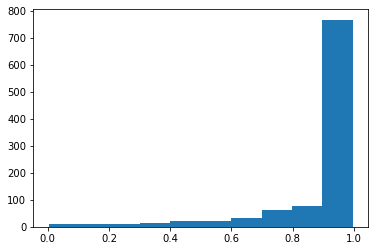

(array([768.,  77.,  64.,  34.,  22.,  20.,  15.,  10.,  11.,   9.]),
 array([0.00288433, 0.1023218 , 0.20175927, 0.30119674, 0.40063421,
        0.50007168, 0.59950915, 0.69894663, 0.7983841 , 0.89782157,
        0.99725904]),
 <BarContainer object of 10 artists>)

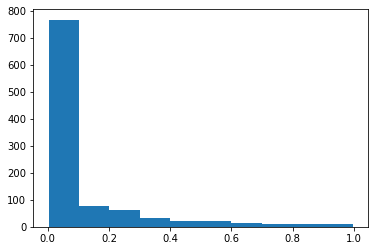

In [44]:
# Visualize the dist
y_pred_prob_t = y_pred_prob.transpose()
plt.hist(y_pred_prob_t[0])
plt.show()
plt.hist(y_pred_prob_t[1])

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [45]:
y_pred3=[]
for prob in y_pred_prob_t[1]:
    if prob > .20:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
        
print(len(y_pred3))
print(len(y_test2))

1030
1030


**Evaluate the model metrics now**

In [47]:
print(f'Accuracy: {accuracy_score(y_test2,y_pred3)}')

Accuracy: 0.8640776699029126


## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [48]:
all_bank_features = pd.get_dummies(bank_df, drop_first = True)

In [51]:
LogReg3 = LogisticRegression(penalty='l2',C=0.01,max_iter=500)

# X and y features
X3 = all_bank_features.drop('y', axis =1)
y3 = all_bank_features['y']

# using train test split to cross val
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state =24)

# fit model
LogReg3.fit(x_train3, y_train3)

LogisticRegression(C=0.01, max_iter=500)

In [52]:
y_pred3 = LogReg3.predict(x_test3)

In [53]:
# Evaluate the metrics
print(f'Accuracy: {accuracy_score(y_test3,y_pred3)}')
print()
print(f'Confusion Matrix:\n {confusion_matrix(y_test3,y_pred3)}')
print()
print(f'ROC-AUC Score: {roc_auc_score(y_test3,y_pred3)}')
print()
print(f'Log Loss: {log_loss(y_test3,y_pred3)}')

Accuracy: 0.9242718446601942

Confusion Matrix:
 [[898  21]
 [ 57  54]]

ROC-AUC Score: 0.7318177807840485

Log Loss: 2.6155741265524934
